In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('FinancialData.csv',names=['label','comment'],encoding="ISO-8859-1")

In [4]:
data.head()

,label,comment
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
data.shape

(4846, 2)

In [6]:
data.dtypes

label      object
comment    object
dtype: object

In [7]:
data.describe

<bound method NDFrame.describe of          label                                            comment
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4846 non-null   object
 1   comment  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [9]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jessy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='label'>

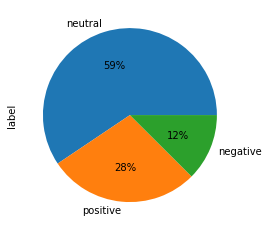

In [11]:
data.label.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [12]:
features = data.iloc[:,:-1].values
labels = data.iloc[:, 0].values

In [13]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    processed_feature= re.sub(r'\s+[a-zA-Z_0-9]\s+', ' ', processed_feature)


    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [15]:
processed_features[4]

' positive '

In [16]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [17]:
max(processed_features[4].tolist())

1.0

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [25]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
pred = DTC.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

[[128   0   0]
 [  0 575   0]
 [  0   0 267]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       128
     neutral       1.00      1.00      1.00       575
    positive       1.00      1.00      1.00       267

    accuracy                           1.00       970
   macro avg       1.00      1.00      1.00       970
weighted avg       1.00      1.00      1.00       970

1.0


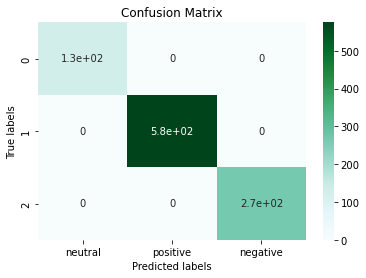

In [28]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["neutral", "positive", "negative"]);

In [24]:
import pickle

In [29]:
pickle.dump(DTC,open('Sentiment model.pkl','wb'))